In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


Load Dataset 

In [2]:
wine = load_wine()
X = wine.data
y = wine.target



Check size and data

In [3]:
print(X.shape)
print(y.shape)
print(X)
print(y)

(178, 13)
(178,)
[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [4]:
feature_names = wine.feature_names
target_names = wine.target_names


In [5]:
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [9]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

Data Scaling 

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [11]:
X_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

Perform PCA by using library 

In [24]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)
print(X_pca_2d)
print(X_pca_2d.shape)
df_pca_2d = pd.DataFrame(X_pca_2d, columns=['PC1', 'PC2'])
df_pca_2d['target'] = y


[[ 3.31675081  1.44346263]
 [ 2.20946492 -0.33339289]
 [ 2.51674015  1.0311513 ]
 [ 3.75706561  2.75637191]
 [ 1.00890849  0.86983082]
 [ 3.05025392  2.12240111]
 [ 2.44908967  1.17485013]
 [ 2.05943687  1.60896307]
 [ 2.5108743   0.91807096]
 [ 2.75362819  0.78943767]
 [ 3.47973668  1.30233324]
 [ 1.7547529   0.61197723]
 [ 2.11346234  0.67570634]
 [ 3.45815682  1.13062988]
 [ 4.31278391  2.09597558]
 [ 2.3051882   1.66255173]
 [ 2.17195527  2.32730534]
 [ 1.89897118  1.63136888]
 [ 3.54198508  2.51834367]
 [ 2.0845222   1.06113799]
 [ 3.12440254  0.78689711]
 [ 1.08657007  0.24174355]
 [ 2.53522408 -0.09184062]
 [ 1.64498834 -0.51627893]
 [ 1.76157587 -0.31714893]
 [ 0.9900791   0.94066734]
 [ 1.77527763  0.68617513]
 [ 1.23542396 -0.08980704]
 [ 2.18840633  0.68956962]
 [ 2.25610898  0.19146194]
 [ 2.50022003  1.24083383]
 [ 2.67741105  1.47187365]
 [ 1.62857912  0.05270445]
 [ 1.90269086  1.63306043]
 [ 1.41038853  0.69793432]
 [ 1.90382623  0.17671095]
 [ 1.38486223  0.65863985]
 

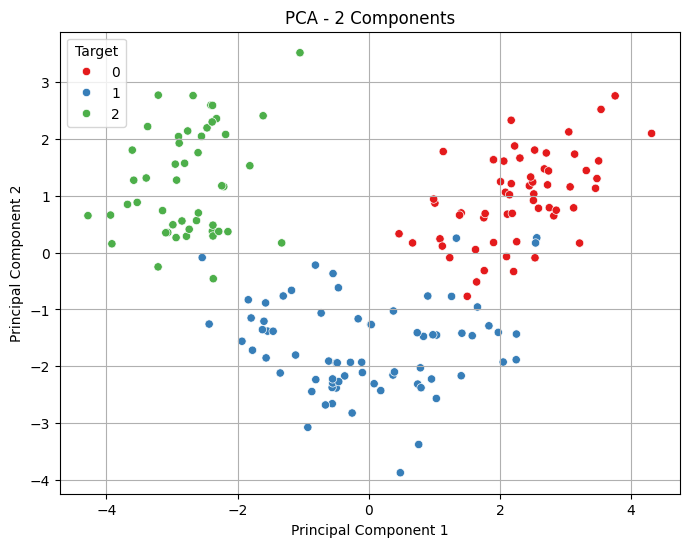

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca_2d, x='PC1', y='PC2', hue='target', palette='Set1')
plt.title('PCA - 2 Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Target')
plt.grid(True)
plt.show()


In [25]:
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)
print(X_pca_3d)
print(X_pca_3d.shape)
df_pca_3d = pd.DataFrame(X_pca_3d, columns=['PC1', 'PC2', 'PC3'])
df_pca_3d['target'] = y


[[ 3.31675081e+00  1.44346263e+00 -1.65739045e-01]
 [ 2.20946492e+00 -3.33392887e-01 -2.02645737e+00]
 [ 2.51674015e+00  1.03115130e+00  9.82818670e-01]
 [ 3.75706561e+00  2.75637191e+00 -1.76191842e-01]
 [ 1.00890849e+00  8.69830821e-01  2.02668822e+00]
 [ 3.05025392e+00  2.12240111e+00 -6.29395827e-01]
 [ 2.44908967e+00  1.17485013e+00 -9.77094891e-01]
 [ 2.05943687e+00  1.60896307e+00  1.46281883e-01]
 [ 2.51087430e+00  9.18070957e-01 -1.77096903e+00]
 [ 2.75362819e+00  7.89437674e-01 -9.84247490e-01]
 [ 3.47973668e+00  1.30233324e+00 -4.22735217e-01]
 [ 1.75475290e+00  6.11977229e-01 -1.19087832e+00]
 [ 2.11346234e+00  6.75706339e-01 -8.65086426e-01]
 [ 3.45815682e+00  1.13062988e+00 -1.20427635e+00]
 [ 4.31278391e+00  2.09597558e+00 -1.26391275e+00]
 [ 2.30518820e+00  1.66255173e+00  2.17902616e-01]
 [ 2.17195527e+00  2.32730534e+00  8.31729866e-01]
 [ 1.89897118e+00  1.63136888e+00  7.94913792e-01]
 [ 3.54198508e+00  2.51834367e+00 -4.85458508e-01]
 [ 2.08452220e+00  1.06113799e+

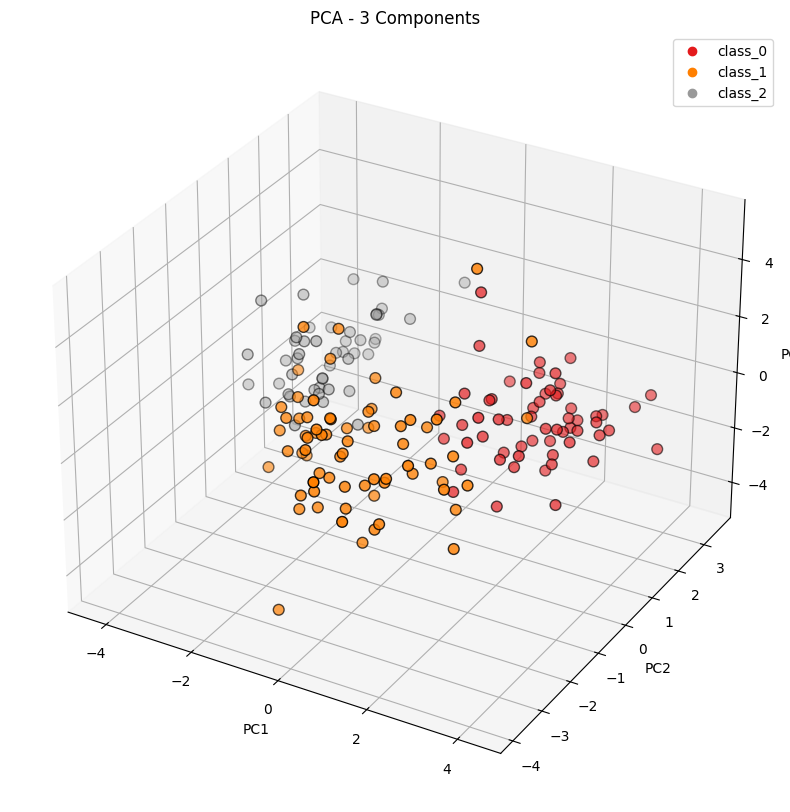

In [28]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df_pca_3d['PC1'], df_pca_3d['PC2'], df_pca_3d['PC3'],
    c=df_pca_3d['target'], cmap='Set1', edgecolor='k', s=60
)

ax.set_title('PCA - 3 Components')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Convert target_names to list to avoid ValueError
plt.legend(handles=scatter.legend_elements()[0], labels=target_names.tolist())
plt.show()


Model(RendomForest) for classification 

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [32]:
clf_original = RandomForestClassifier(random_state=42)
clf_original.fit(X_train, y_train)
y_pred_orig = clf_original.predict(X_test)

acc_orig = accuracy_score(y_test, y_pred_orig)
print(f'Accuracy on Original Data: {acc_orig:.4f}')
print(classification_report(y_test, y_pred_orig, target_names=target_names))


Accuracy on Original Data: 1.0000
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [36]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RandomForestClassifier(), X_train, y_train, cv=5)
print("Cross-validation accuracy: ", scores.mean())


Cross-validation accuracy:  0.9714285714285715


Model( Decision Tree ) for Classification 

In [46]:
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_train, y_train)

y_pred_dt = clf_dt.predict(X_test)

acc_dt = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy on Original Data using Decision Tree: {acc_dt:.4f}')
print(classification_report(y_test, y_pred_dt, target_names=target_names))

Accuracy on Original Data using Decision Tree: 0.9444
              precision    recall  f1-score   support

     class_0       0.93      0.93      0.93        14
     class_1       0.93      1.00      0.97        14
     class_2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



In [47]:

from sklearn.model_selection import cross_val_score

scores = cross_val_score(DecisionTreeClassifier(), X_train, y_train, cv=5)
print("Cross-validation accuracy: ", scores.mean())


Cross-validation accuracy:  0.9152709359605913


In [37]:
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca_2d, y, test_size=0.2, random_state=42)

In [ ]:
clf_pca = RandomForestClassifier(random_state=42)
clf_pca.fit(X_pca_train, y_pca_train)
y_pred_pca = clf_pca.predict(X_pca_test)

acc_pca = accuracy_score(y_pca_test, y_pred_pca)
print(f'Accuracy on PCA (2D) Data: {acc_pca:.4f}')
print(classification_report(y_pca_test, y_pred_pca, target_names=target_names))


Accuracy on PCA (2D) Data: 1.0000
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [19]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RandomForestClassifier(), X_pca_train, y_pca_train, cv=5)
print("Cross-validation accuracy: ", scores.mean())


Cross-validation accuracy:  0.9576354679802955


In [39]:

clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_pca_train, y_pca_train)

y_pred_pca = clf_dt.predict(X_pca_test)

acc_dt = accuracy_score(y_pca_test, y_pred_pca)
print(f'Accuracy on PCA Data using Decision Tree: {acc_dt:.4f}')
print(classification_report(y_pca_test, y_pred_pca, target_names=target_names))

Accuracy on PCA Data using Decision Tree: 1.0000
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [23]:
X_pca_train.shape

(142, 2)

PCA from scratch 

In [44]:
class PCA_Component:
    def __init__(self, n_components):
        self.n_components = n_components
        self.mean = None
        self.components = None
        self.explained_variance = None

    def fit(self, X):
        # Standardize the data
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean
        X_std = X_centered / np.std(X_centered, axis=0)

        # Compute covariance matrix
        cov_matrix = np.cov(X_std.T)

        # Compute eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
        # print("Eigenvalues:", eigenvalues)
        # print("Eigenvectors:", eigenvectors)

        # Sort eigenvalues and eigenvectors
        sorted_idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_idx]
        eigenvectors = eigenvectors[:, sorted_idx]

        # Select top-k components
        self.components = eigenvectors[:, :self.n_components]
        self.explained_variance = eigenvalues[:self.n_components]

    def transform(self, X):
        X_centered = X - self.mean
        X_std = X_centered / np.std(X_centered, axis=0)
        return np.dot(X_std, self.components)

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

    def explained_variance_ratio(self):
        return self.explained_variance / np.sum(self.explained_variance)


In [50]:
pca_2d = PCA_Component(n_components=2)
X_pca_2d_custom= pca_2d.fit_transform(X_scaled)
print("Selected Components",X_pca_2d_custom)
print("Shape ",X_pca_2d_custom.shape)
df_pca_2d_custom = pd.DataFrame(X_pca_2d_custom, columns=['PC1', 'PC2'])
df_pca_2d_custom['target'] = y


Selected Components [[-3.31675081 -1.44346263]
 [-2.20946492  0.33339289]
 [-2.51674015 -1.0311513 ]
 [-3.75706561 -2.75637191]
 [-1.00890849 -0.86983082]
 [-3.05025392 -2.12240111]
 [-2.44908967 -1.17485013]
 [-2.05943687 -1.60896307]
 [-2.5108743  -0.91807096]
 [-2.75362819 -0.78943767]
 [-3.47973668 -1.30233324]
 [-1.7547529  -0.61197723]
 [-2.11346234 -0.67570634]
 [-3.45815682 -1.13062988]
 [-4.31278391 -2.09597558]
 [-2.3051882  -1.66255173]
 [-2.17195527 -2.32730534]
 [-1.89897118 -1.63136888]
 [-3.54198508 -2.51834367]
 [-2.0845222  -1.06113799]
 [-3.12440254 -0.78689711]
 [-1.08657007 -0.24174355]
 [-2.53522408  0.09184062]
 [-1.64498834  0.51627893]
 [-1.76157587  0.31714893]
 [-0.9900791  -0.94066734]
 [-1.77527763 -0.68617513]
 [-1.23542396  0.08980704]
 [-2.18840633 -0.68956962]
 [-2.25610898 -0.19146194]
 [-2.50022003 -1.24083383]
 [-2.67741105 -1.47187365]
 [-1.62857912 -0.05270445]
 [-1.90269086 -1.63306043]
 [-1.41038853 -0.69793432]
 [-1.90382623 -0.17671095]
 [-1.384

In [51]:
X_pca_train_custom, X_pca_test_custom, y_pca_train_custom, y_pca_test_custom = train_test_split(X_pca_2d, y, test_size=0.2, random_state=42)

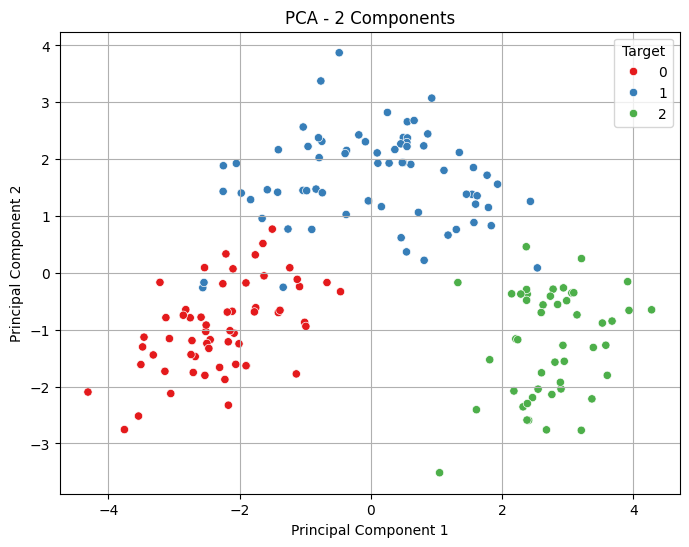

In [52]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca_2d_custom, x='PC1', y='PC2', hue='target', palette='Set1')
plt.title('PCA - 2 Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Target')
plt.grid(True)
plt.show()


In [53]:
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_pca_train_custom, y_pca_train_custom)

y_pred_custom = clf_dt.predict(X_pca_test_custom)

acc_dt = accuracy_score(y_pca_test_custom, y_pred_custom)
print(f'Accuracy on Original Data using Decision Tree: {acc_dt:.4f}')
print(classification_report(y_pca_test_custom, y_pred_custom, target_names=target_names))

Accuracy on Original Data using Decision Tree: 0.9722
              precision    recall  f1-score   support

     class_0       0.93      1.00      0.97        14
     class_1       1.00      0.93      0.96        14
     class_2       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



In [54]:

from sklearn.model_selection import cross_val_score

scores = cross_val_score(DecisionTreeClassifier(), X_pca_train_custom, y_pca_train_custom, cv=5)
print("Cross-validation accuracy: ", scores.mean())

Cross-validation accuracy:  0.9364532019704432
